## Importing libaries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

## Importing data

In [2]:
df = pd.read_csv('MarquesBrownlee_cleaned.csv')
df.drop(columns = ['Unnamed: 0'], inplace = True)
df.head()

,comment_count,dislike_count,duration,like_count,view_count,days_after_last_video,title_length,description_length,tag_count,weekend,...,season_1,season_3,day_part_0,day_part_1,day_part_3,review,apple,google,samsung,tesla
0,6,5,315,33,2422,62,37,273,17,0,...,1,0,0,1,0,0,0,0,0,0
1,40,18,574,159,14159,109,41,214,11,0,...,0,0,0,0,1,0,0,0,0,0
2,8,1,139,36,2561,107,48,234,6,0,...,0,1,0,1,0,0,0,0,0,0
3,6,5,219,26,2270,0,36,395,21,0,...,0,1,0,1,0,0,0,0,0,0
4,10,2,350,38,3481,28,32,253,7,0,...,0,1,0,1,0,0,0,0,0,0


## Splitting the data into predictors and target

In [3]:
X = df.drop(columns = ['view_count'])
y = df['view_count']

In [4]:
X.info()
#checking datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1112 entries, 0 to 1111
Data columns (total 20 columns):
comment_count            1112 non-null int64
dislike_count            1112 non-null int64
duration                 1112 non-null int64
like_count               1112 non-null int64
days_after_last_video    1112 non-null int64
title_length             1112 non-null int64
description_length       1112 non-null int64
tag_count                1112 non-null int64
weekend                  1112 non-null int64
season_0                 1112 non-null int64
season_1                 1112 non-null int64
season_3                 1112 non-null int64
day_part_0               1112 non-null int64
day_part_1               1112 non-null int64
day_part_3               1112 non-null int64
review                   1112 non-null int64
apple                    1112 non-null int64
google                   1112 non-null int64
samsung                  1112 non-null int64
tesla                    1112 non-null

## Dealing with multicollinearity between predictors

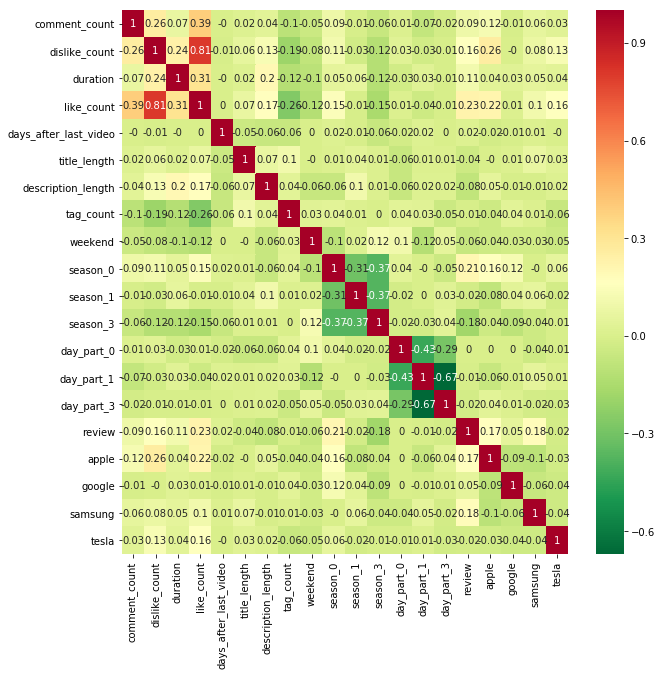

In [5]:
plt.figure(figsize = (10,10))
sns.heatmap(round(X.corr(), 2), cmap = 'RdYlGn_r', annot = True);
#like count and dislike count have a high multicollinearity

In [6]:
X['like_dislike_ratio'] = X['like_count'] / (X['dislike_count'] + X['like_count'])
X.drop(columns = ['like_count','dislike_count'], inplace = True)
#removing collinearity between like count and dislike count

## Splitting the data into training and test sets for model validation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Scaling the numerical predictors

In [8]:
X_train_num = X_train.drop(columns = ['weekend', 'season_0', 'season_1', 'season_3', 'day_part_0', 'day_part_1', 
                                            'day_part_3', 'review', 'apple', 'google' , 'samsung','tesla'])

X_test_num = X_test.drop(columns = ['weekend', 'season_0', 'season_1', 'season_3', 'day_part_0', 'day_part_1', 
                                            'day_part_3', 'review', 'apple', 'google' , 'samsung','tesla'])

X_train_cat = X_train[['weekend', 'season_0', 'season_1', 'season_3', 'day_part_0', 'day_part_1', 
                     'day_part_3', 'review', 'apple', 'google' , 'samsung','tesla']]

X_test_cat = X_test[['weekend', 'season_0', 'season_1', 'season_3', 'day_part_0', 'day_part_1', 
                     'day_part_3', 'review', 'apple', 'google' , 'samsung','tesla']]
#splitting the predictors into categorical and numerical

In [9]:
scaler = MinMaxScaler()

X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train_num), columns = X_train_num.columns, index = X_train_num.index)
X_test_num_scaled = pd.DataFrame(scaler.transform(X_test_num), columns = X_test_num.columns, index = X_test_num.index)

X_train_scaled = pd.concat([X_train_num_scaled, X_train_cat], axis = 1)
X_test_scaled = pd.concat([X_test_num_scaled, X_test_cat], axis = 1)

X_train_scaled.head()
#scaling numerical predictors and merging back with categorical predictors

/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,comment_count,duration,days_after_last_video,title_length,description_length,tag_count,like_dislike_ratio,weekend,season_0,season_1,season_3,day_part_0,day_part_1,day_part_3,review,apple,google,samsung,tesla
59,0.000023,0.073066,0.000000,0.746032,0.045553,0.161765,0.800857,1,0,0,1,0,0,1,0,0,0,0,0
13,0.000040,0.051691,0.000000,0.301587,0.006236,0.044118,0.952228,0,0,0,1,0,0,1,0,0,0,0,0
649,0.015256,0.394481,0.015385,0.269841,0.131508,0.220588,0.973082,0,1,0,0,0,1,0,1,0,1,0,0
262,0.000162,0.085892,0.015385,0.587302,0.085141,0.367647,0.689067,0,1,0,0,0,0,1,0,0,0,0,0
828,0.005332,0.150019,0.010256,0.349206,0.143980,0.088235,0.976658,0,0,0,1,0,0,1,0,0,0,0,0


## Creating a function for validating models

In [10]:
def train_vs_test(model, X_train, X_test, y_train, y_test):
    
    r_2_train = np.mean(cross_val_score(model, X_train, y_train, cv = 5))
    
    y_test_hat = model.predict(X_test)
    r_2_test = r2_score(y_test, y_test_hat)
    
    #return print(('The R^2 for the train set is {} \nThe R^2 for the test set is {} '.format(round(r_2_train, 4), round( r_2_test, 4))))
    return r_2_train, r_2_test

## First Model - All predictors in feature space

In [11]:
linreg = LinearRegression()
model_1 = linreg.fit(X_train_scaled, y_train)

In [12]:
train_vs_test(model_1, X_train_scaled, X_test_scaled, y_train, y_test)
#considerable overfitting 

(0.3400760463682079, -0.6795568271693275)

## Removing predictors from feature space to reduce overfitting

### Using coefficients

In [13]:
model_1_coeff = pd.DataFrame(list(zip(X.columns, model_1.coef_)), columns = ['predictor', 'coefficient_abs'])
model_1_coeff['coefficient_abs'] = model_1_coeff['coefficient_abs'].map(abs).astype('int')
model_1_coeff.sort_values(by = 'coefficient_abs', ascending = False)
#season_0 and season_1 predictors have considerably smaller coefficients than rest of predictors

,predictor,coefficient_abs
1,duration,6794499
0,comment_count,6456926
5,tag_count,1569923
15,google,1267364
4,description_length,1026335
18,like_dislike_ratio,1016551
17,tesla,795983
14,apple,688204
2,days_after_last_video,454361
10,day_part_0,292941


In [14]:
X_train_scaled.drop(columns = ['season_0', 'season_1'], inplace = True)
X_test_scaled.drop(columns = ['season_0', 'season_1'], inplace = True)
#removing season_0 and season_1 predictors from training and test sets

### Using threshold feature variance selection

#### Numerical predictors

In [15]:
num_vars = pd.DataFrame(X_train_num_scaled.var()).reset_index()
num_vars.columns = ['predictor', 'scaled_variance']
num_vars.sort_values(by = 'scaled_variance')
#no predictor has an particularly small scaled variance

,predictor,scaled_variance
0,comment_count,0.001879
2,days_after_last_video,0.002040
4,description_length,0.005012
1,duration,0.007927
6,like_dislike_ratio,0.013455
5,tag_count,0.017814
3,title_length,0.022584


#### Categorical predictors

In [16]:
X_train_cat = X_train[['weekend','season_3', 'day_part_0', 'day_part_1', 'day_part_3',
                       'review', 'apple', 'google' , 'samsung', 'tesla']]
cat_probs = X_train_cat.sum() / len(X_train_cat)
cat_vars = pd.DataFrame(cat_probs * (1 - cat_probs)).reset_index()
cat_vars.columns = ['predictor', 'binomial_variance']
cat_vars.sort_values(by = 'binomial_variance')
#tesla predictor has a considerably smaller binomial variance than rest of predictors

,predictor,binomial_variance
9,tesla,0.016588
7,google,0.069686
8,samsung,0.078181
6,apple,0.093668
2,day_part_0,0.127224
0,weekend,0.177422
5,review,0.200144
4,day_part_3,0.210583
1,season_3,0.213217
3,day_part_1,0.249947


In [17]:
X_train_scaled.drop(columns = ['tesla'], inplace = True)
X_test_scaled.drop(columns = ['tesla'], inplace = True)
#removing tesla predictor from training and test sets

### Using recursive feature elimination to select top n predictors

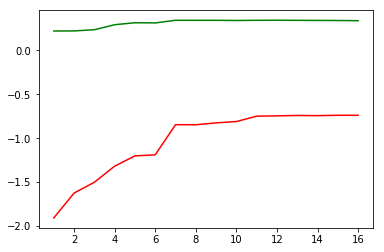

In [18]:
predictor_counts = []
train_r2_vals = []
test_r2_vals = []

for i in range(1,17):   
    rfe_n = RFE(estimator=linreg, n_features_to_select= i)
    rfe_n.fit_transform(X_train_scaled, y_train)
    keep_predictors_index_n = [i[0] for i in list(enumerate(rfe_n.support_)) if i[1] == True]
    keep_predictors_n = list(X_train_scaled.columns[keep_predictors_index_n])
    predictor_counts.append(len(keep_predictors_n))
    X_train_scaled_n = X_train_scaled[keep_predictors_n]
    X_test_scaled_n = X_test_scaled[keep_predictors_n]
    model_n = linreg.fit(X_train_scaled_n, y_train)
    r2_train_n, r2_test_n = train_vs_test(model_n, X_train_scaled_n, X_test_scaled_n, y_train, y_test)
    train_r2_vals.append(r2_train_n)
    test_r2_vals.append(r2_test_n)
plt.plot(predictor_counts, test_r2_vals, color = 'red')
plt.plot(predictor_counts, train_r2_vals, color = 'green');
# test r^2 stagnates past 11 predictors

In [19]:
rfe = RFE(estimator=linreg, n_features_to_select= 11)
rfe.fit_transform(X_train_scaled, y_train)
keep_predictors_index = [i[0] for i in list(enumerate(rfe.support_)) if i[1] == True]
keep_predictors = list(X_train_scaled.columns[keep_predictors_index])
keep_predictors

['comment_count',
 'duration',
 'days_after_last_video',
 'title_length',
 'description_length',
 'tag_count',
 'like_dislike_ratio',
 'season_3',
 'review',
 'apple',
 'samsung']

## Second Model - top 11 predictors in feature space

In [20]:
X_train_scaled = X_train_scaled[keep_predictors]
X_test_scaled = X_test_scaled[keep_predictors]

In [21]:
model_2 = linreg.fit(X_train_scaled, y_train)

In [22]:
train_vs_test(model_2, X_train_scaled, X_test_scaled, y_train, y_test)
#still considerable overfitting 

(0.3425615357690878, -0.7495773598097815)

## Third Model - adding interaction terms 

In [ ]:
poly = PolynomialFeatures(2, include_bias=False)
X_train_poly = pd.DataFrame(poly.fit_transform(X_train_scaled), 
                            columns = poly.get_feature_names(X_train_scaled.columns))
X_test_poly = pd.DataFrame(poly.transform(X_test_scaled), 
                            columns = poly.get_feature_names(X_test_scaled.columns))

### With l2 regularisation

In [38]:
ridge_cv = RidgeCV(np.arange(0.5,5,0.5))
model_cv = ridge_cv.fit(X_train_poly, y_train)
model_cv.alpha_

2.5

In [39]:
ridge = Ridge(alpha = 2.5)
model_3a = ridge.fit(X_train_poly, y_train)

In [40]:
train_vs_test(model_3a, X_train_poly, X_test_poly, y_train, y_test)

(0.40473730828579, 0.4299751772801965)

### With l1 regularisation

In [53]:
lasso_cv = LassoCV(alphas = np.arange(25,150,25))
model_cv = lasso_cv.fit(X_train_poly, y_train)
model_cv.alpha_

/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective 

100

In [54]:
lasso = Lasso(alpha = 100)
model_3b = lasso.fit(X_train_poly, y_train)

/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [55]:
train_vs_test(model_3b, X_train_poly, X_test_poly, y_train, y_test)

/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/jacktann/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

(-0.6608726704487587, -10.677132117011238)

## Final Model 

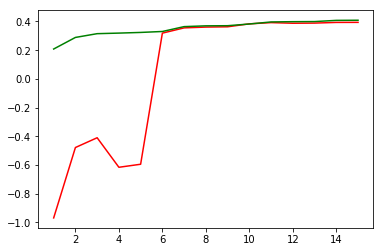

In [58]:
predictor_counts = []
train_r2_vals = []
test_r2_vals = []

for i in range(1,16):   
    rfe_n = RFE(estimator=ridge, n_features_to_select= i)
    rfe_n.fit_transform(X_train_poly, y_train)
    keep_predictors_index_n = [i[0] for i in list(enumerate(rfe_n.support_)) if i[1] == True]
    keep_predictors_n = list(X_train_poly.columns[keep_predictors_index_n])
    predictor_counts.append(len(keep_predictors_n))
    X_train_poly_n = X_train_poly[keep_predictors_n]
    X_test_poly_n = X_test_poly[keep_predictors_n]
    model_n = ridge.fit(X_train_poly_n, y_train)
    r2_train_n, r2_test_n = train_vs_test(model_n, X_train_poly_n, X_test_poly_n, y_train, y_test)
    train_r2_vals.append(r2_train_n)
    test_r2_vals.append(r2_test_n)
plt.plot(predictor_counts, test_r2_vals, color = 'red')
plt.plot(predictor_counts, train_r2_vals, color = 'green');
# test r^2 stagnates past 6 predictors

In [61]:
rfe = RFE(estimator=ridge, n_features_to_select= 6)
rfe.fit_transform(X_train_poly, y_train)
keep_poly_predictors_index = [i[0] for i in list(enumerate(rfe.support_)) if i[1] == True]
keep_poly_predictors = list(X_train_poly.columns[keep_poly_predictors_index])
keep_poly_predictors

['comment_count',
 'duration',
 'comment_count like_dislike_ratio',
 'duration^2',
 'duration like_dislike_ratio',
 'duration review']

In [62]:
X_train_poly = X_train_poly[keep_poly_predictors]
X_test_poly = X_test_poly[keep_poly_predictors]

In [63]:
model_final = ridge.fit(X_train_poly, y_train)

In [64]:
train_vs_test(model_final, X_train_poly, X_test_poly, y_train, y_test)

(0.33043960425008184, 0.31887492951438257)